# Hierarchial Clustering algorithm

A hierarchical clustering approach is based on the determination of successive clusters based on previously defined clusters. In Hierarchical Clustering, the aim is to produce a hierarchical series of nested clusters. A diagram called **Dendrogram** (A Dendrogram is a tree-like diagram that statistics the sequences of merges or splits) graphically represents this hierarchy and is an inverted tree that describes the order in which factors are merged (bottom-up view) or clusters are broken up (top-down view).

## Importing and loading data

In [8]:
# Import required libraries
import pandas as pd
import numpy as np

# Plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv('datasets/student_evaluation.csv')

# Check the data
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# Take a sample of the data
data = data[:100]

# Print the shape and columns of the data
print('Shape:', data.shape)
print('Columns:', data.columns)

Shape: (100, 33)
Columns: Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')


## Scale the data

In [4]:
# Perform Standard Scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pd.DataFrame(data_scaled).describe().round(3)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,100.0,100.0,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,...,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
mean,0.0,0.0,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,...,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000
std,0.0,0.0,1.005,1.005,1.005,1.005,1.005,1.005,1.005,1.005,...,1.005,1.005,1.005,1.005,1.005,1.005,1.005,1.005,1.005,1.005
min,0.0,0.0,-0.277,-1.607,-2.375,-1.658,-1.776,-1.762,-1.774,-1.876,...,-1.905,-1.955,-1.922,-1.895,-1.896,-1.957,-1.911,-1.835,-1.794,-1.867
25%,0.0,0.0,-0.277,-0.812,-0.292,-0.964,-0.344,-0.330,-0.326,-0.433,...,-0.445,-0.463,-0.460,-0.443,-0.438,-0.457,-0.458,-0.401,-0.376,-0.431
50%,0.0,0.0,-0.277,-0.016,-0.292,0.423,0.372,0.387,0.398,0.289,...,0.285,0.284,0.270,0.283,0.292,0.292,0.269,0.315,0.333,0.287
75%,0.0,0.0,-0.277,0.780,0.750,1.117,1.089,1.103,1.122,1.010,...,1.014,1.030,1.001,1.009,1.021,1.042,0.996,1.032,1.042,1.005
max,0.0,0.0,4.756,1.575,1.792,1.117,1.089,1.103,1.122,1.010,...,1.014,1.030,1.001,1.009,1.021,1.042,0.996,1.032,1.042,1.005


## Model building

### Train the scaled data

In [6]:
# Create AgglomerativeClustering instance
clustering = AgglomerativeClustering()

# Fit the model
clusters = clustering.fit(data_scaled)
print(clusters)

AgglomerativeClustering()


### Plot dendrograms

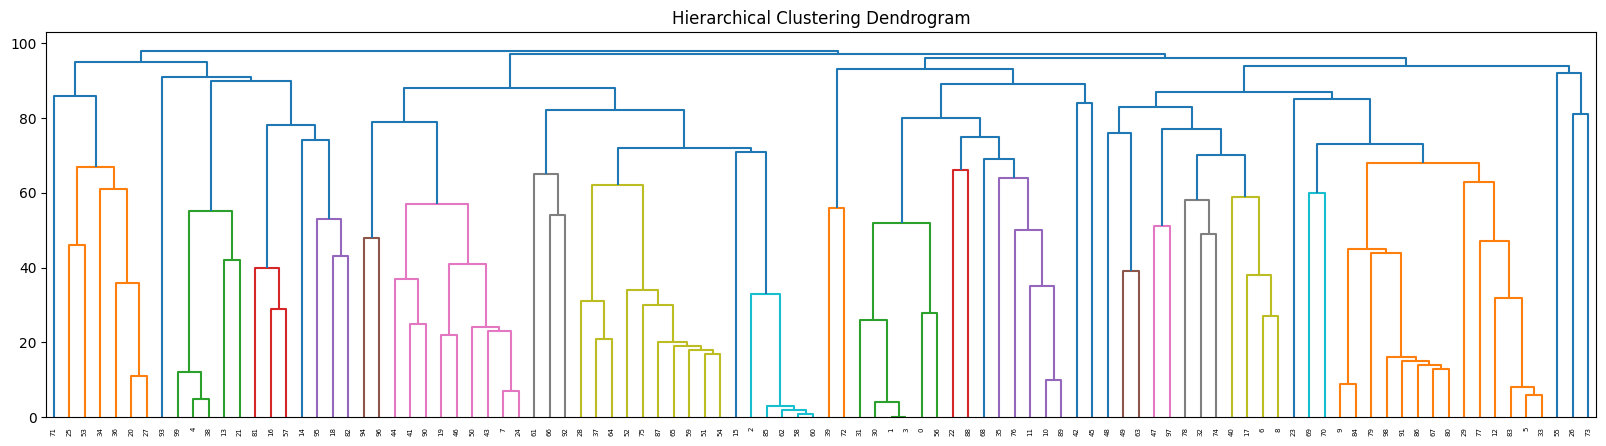

In [9]:
def plot_dendrogram(model):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix)

plt.figure(figsize = (20,5))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clusters)

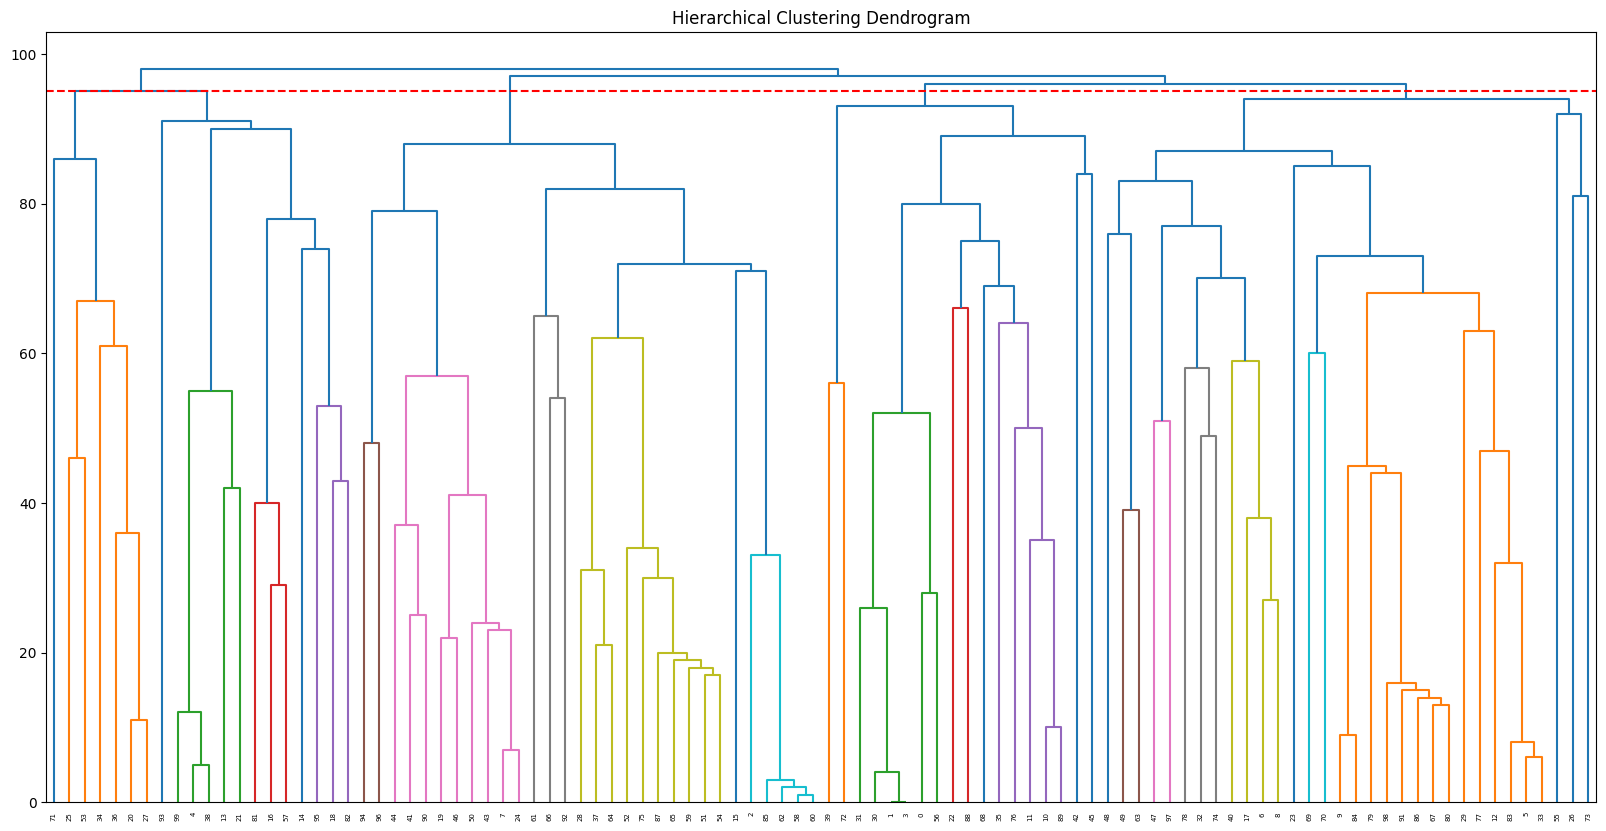

In [10]:
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clusters)
plt.axhline(y = 95, color='r', linestyle = '--',)

### Train the model again with number of clusters

**Number of clusters (K):** number of times the line touches the tree. In this case, the line is touching 4 times.

In [11]:
# Create AgglomerativeClustering instance
clustering = AgglomerativeClustering(n_clusters = 4)

# Fit the model
clusters = clustering.fit(data_scaled)
print(clusters)

AgglomerativeClustering(n_clusters=4)


In [12]:
# Check the frequency of the predictions
pd.Series(clusters.labels_).value_counts()

1    32
2    30
0    20
3    18
Name: count, dtype: int64